In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Install Vietnamese NLP
!pip install underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.8 MB/s eta 0:00:00


In [6]:
#Install package to work with Emoji
!pip install demoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.5 MB/s eta 0:00:00


In [7]:
#install Vietnamese NLP for text-processing
!pip install pyvi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 67.1 MB/s eta 0:00:00


In [8]:
#installing package prepare for processing
import pandas as pd
import numpy as np
from underthesea import word_tokenize, pos_tag, sent_tokenize
import regex
import demoji
from pyvi import ViPosTagger, ViTokenizer
import string
import matplotlib.pyplot as plt



Load in emoji files, short-words files, eng-vietnamese files, vietnamese stopwords files for pre-processing and tunning

#Loading Files

In [9]:
file = open('/content/drive/MyDrive/Cung_cap_HV_ShopeeFood/files/emojicon.txt', 'r', encoding="utf8")
emoji_lst = file.read().split('\n')
emoji_dict = {}
for line in emoji_lst:
    key, value = line.split('\t')
    emoji_dict[key] = str(value)
file.close()

In [10]:
file = open('/content/drive/MyDrive/Cung_cap_HV_ShopeeFood/files/teencode.txt', 'r', encoding="utf8")
teen_lst = file.read().split('\n')
teen_dict = {}
for line in teen_lst:
    key, value = line.split('\t')
    teen_dict[key] = str(value)
file.close()

In [11]:
file = open('/content/drive/MyDrive/Cung_cap_HV_ShopeeFood/files/english-vnmese.txt', 'r', encoding="utf8")
english_lst = file.read().split('\n')
english_dict = {}
for line in english_lst:
    key, value = line.split('\t')
    english_dict[key] = str(value)
file.close()

In [12]:
file = open('/content/drive/MyDrive/Cung_cap_HV_ShopeeFood/files/wrong-word.txt', 'r', encoding="utf8")
wrong_lst = file.read().split('\n')
file.close()

In [13]:
file = open('/content/drive/MyDrive/Cung_cap_HV_ShopeeFood/files/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords_lst = file.read().split('\n')
file.close()

#PRE-PROCESSING

In [14]:
def process_text(text, emoji_dict, teen_dict, wrong_lst):
    document = text.lower()
    document = document.replace("’",'')
    document = regex.sub(r'\.+', ".", document)
    new_sentence =''
    for sentence in sent_tokenize(document):
        # if not(sentence.isascii()):
        ###### CONVERT EMOJICON
        sentence = ''.join(' ' + emoji_dict[word] + ' ' if word in emoji_dict else word for word in list(sentence))
        ###### CONVERT TEENCODE
        sentence = ' '.join(teen_dict[word] if word in teen_dict else word for word in sentence.split())
        ###### translate EN to VN
        sentence = ' '.join(english_dict[word] if word in english_dict else word for word in sentence.split())
        ###### DEL Punctuation & Numbers
        pattern = r'(?i)\b[a-záàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]+\b'
        sentence = ' '.join(regex.findall(pattern,sentence))
        # ...
        ###### DEL wrong words
        sentence = ' '.join('' if word in wrong_lst else word for word in sentence.split())
        new_sentence = new_sentence + sentence + '. '
    document = new_sentence
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    #...
    return document

In [15]:
#Giving out and example
example = '''Đồ ăn dở tệ, chả có gì ngon pizza thì mắc mà còn làm dai chả ăn nổi cái gì. Nước Ngọt thì cũng lấy nhầm cũng chả hiểu nổi '''
print(example)

Đồ ăn dở tệ, chả có gì ngon pizza thì mắc mà còn làm dai chả ăn nổi cái gì. Nước Ngọt thì cũng lấy nhầm cũng chả hiểu nổi 


In [21]:
#Processing the sentences using files import above
document = process_text(example, emoji_dict, teen_dict, wrong_lst)
document

'đồ ăn dở tệ chả có gì thì mắc mà còn làm chả ăn nổi cái gì. nước ngọt thì cũng lấy nhầm cũng chả hiểu nổi.'

The function 'loaddicchar' and 'covert_unicode' converting text encode in non-standard or legacy format into UFT-8

In [22]:
def loaddicchar():
    uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
    unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic

In [23]:
def covert_unicode(txt):
    dicchar = loaddicchar()
    return regex.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [24]:
#Review the example to see the different
document = covert_unicode(document)
document

'đồ ăn dở tệ chả có gì thì mắc mà còn làm chả ăn nổi cái gì. nước ngọt thì cũng lấy nhầm cũng chả hiểu nổi.'

In [25]:
#Processing text-string by identifying negative word (negative_lst) and combining that word with the word following them which will create a new compound words refelct negative context
def process_special_word(text):
    new_text = ''
    text_lst = text.split()
    i= 0
    negative_lst= ['không', 'chẳng', 'chả']
    for w in negative_lst:
        if w in text_lst:
            while i <= len(text_lst) - 1:
                word = text_lst[i]
                if word == w:
                    next_idx = i+1
                    if next_idx <= len(text_lst) -1:
                        word = word +'_'+ text_lst[next_idx]
                    i= next_idx + 1
                else:
                    i = i+1
                new_text = new_text + word + ' '
        else:
            new_text = text
    return new_text.strip()

In [26]:
#As you see with the word chả they connect with word after them by '_'
p = process_special_word(document)
p

'đồ ăn dở tệ chả có gì thì mắc mà còn làm chả ăn nổi cái gì. nước ngọt thì cũng lấy nhầm cũng chả hiểu nổi.đồ ăn dở tệ chả_có gì thì mắc mà còn làm chả_ăn nổi cái gì. nước ngọt thì cũng lấy nhầm cũng chả_hiểu nổi.'

In [27]:
#check duplicate
import re
def normalize_repeated_characters(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [28]:
document = normalize_repeated_characters(document)
print(document)

đồ ăn dở tệ chả có gì thì mắc mà còn làm chả ăn nổi cái gì. nước ngọt thì cũng lấy nhầm cũng chả hiểu nổi.


In [29]:
#we will focus on tokenizeing the text , apply part of speech(POS) tag,filtering words based on their POS tags.
def process_postag_thesea(text):
    new_document = ''
    for sentence in sent_tokenize(text):
        sentence = sentence.replace('.', '')
        lst_word_type = ['N','Np','A','AB','V','VB','VY','R']
        sentence = ' '.join(word[0] if word[1].upper() in lst_word_type else ''
                            for word in pos_tag(process_special_word(word_tokenize(sentence, format="text"))))
        new_document = new_document + sentence + ' '
    new_document = regex.sub(r'\s+', ' ', new_document).strip()
    return new_document

In [30]:
def remove_stopword(text, stopwords):
    ###### REMOVE stop words
    document = ' '.join('' if word in stopwords else word for word in text.split())
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [31]:
#Remove all the stop word
document = remove_stopword(document, stopwords_lst)
document

'đồ dở tệ chả mắc chả nổi gì. nhầm chả nổi.'

In [32]:
# Additional Words for positive
positive_words = [
    "thích", "tốt", "xuất sắc", "tuyệt vời", "tuyệt hảo", "đẹp", "ổn", "ngon",
    "hài lòng", "ưng ý", "hoàn hảo", "chất lượng", "thú vị", "nhanh",
    "tiện lợi", "dễ sử dụng", "hiệu quả", "ấn tượng",
    "nổi bật", "tận hưởng", "tốn ít thời gian", "thân thiện", "hấp dẫn",
    "gợi cảm", "tươi mới", "lạ mắt", "cao cấp", "độc đáo",
    "hợp khẩu vị", "rất tốt", "rất thích", "tận tâm", "đáng tin cậy", "đẳng cấp",
    "hấp dẫn", "an tâm", "không thể cưỡng lại", "thỏa mãn", "thúc đẩy",
    "cảm động", "phục vụ tốt", "làm hài lòng", "gây ấn tượng", "nổi trội",
    "sáng tạo", "quý báu", "phù hợp", "tận tâm",
    "hiếm có", "cải thiện", "hoà nhã", "chăm chỉ", "cẩn thận",
    "vui vẻ", "sáng sủa", "hào hứng", "đam mê", "vừa vặn", "đáng tiền"
]
positive_words2 = [
    "ngon", "hấp dẫn", "phong phú", "tươi mới", "đặc sắc", "sáng tạo", "phục vụ tốt",
    "thú vị", "lôi cuốn", "thơm ngon", "ấn tượng", "tốt", "thân thiện", "linh hoạt",
    "nhanh chóng", "chất lượng", "sống động", "ổn định", "phục vụ nhanh", "vui vẻ",
    "tươi tắn", "ngon miệng", "ấm cúng", "tận tâm", "ấm áp", "hạnh phúc", "phấn khích",
    "nồng hậu", "thân thiện", "thoải mái", "lành mạnh", "thăng hoa", "tuyệt vời",
    "thăng hoa", "phấn chấn", "tràn ngập", "thú vị", "lạc quan", "đam mê", "khích lệ",
    "lựa chọn tốt", "đặc biệt", "phô diễn", "quyến rũ", "nổi bật", "tự tin", "thoải mái",
    "quyến rũ", "lôi cuốn", "ấn tượng", "phấn khích", "mê hoặc", "thiết thực", "hoàn hảo",
    "thỏa mãn", "đầy đủ", "vô song", "kỳ diệu", "đáng kinh ngạc", "đẹp đẽ",
    "khêu gợi", "tinh tế", "ấn tượng", "vô tận", "mạnh mẽ", "năng động", "quyết đoán"
]
for word in positive_words2:
  if word in positive_words:
    continue
  else:
    positive_words.append(word)

In [33]:
#  Additional Words for negative
negative_words = [
    "kém", "tệ", "đau", "xấu", "dở", "ức",
    "buồn", "rối", "thô", "lâu", "chán"
    "tối", "chán", "ít", "mờ", "mỏng",
    "lỏng lẻo", "khó", "cùi", "yếu",
    "kém chất lượng", "không thích", "không thú vị", "không ổn",
    "không hợp", "không đáng tin cậy", "không chuyên nghiệp",
    "không phản hồi", "không an toàn", "không phù hợp", "không thân thiện", "không linh hoạt", "không đáng giá",
    "không ấn tượng", "không tốt", "chậm", "khó khăn", "phức tạp",
    "khó hiểu", "khó chịu", "gây khó dễ", "rườm rà", "khó truy cập",
    "thất bại", "tồi tệ", "khó xử", "không thể chấp nhận", "tồi tệ","không rõ ràng",
    "không chắc chắn", "rối rắm", "không tiện lợi", "không đáng tiền", "chưa đẹp", "không đẹp"
]
negative_words2 = [
    "kém chất lượng", "không hấp dẫn", "thất vọng", "không đặc sắc", "nhạt nhòa",
    "mất hứng thú", "không tươi mới", "nguội lạnh", "khó ăn", "đắng", "chán ngấy",
    "chất lượng kém", "phục vụ chậm trễ", "khó chịu", "thiếu thái độ", "mất uy tín",
    "bế tắc", "ếch ngồi", "đen kịt", "mất hứng thú", "đau bụng", "đắng chát",
    "nặng nề", "dở", "đỏ mặt", "lạt mắt", "mùi tanh", "kém linh hoạt", "không ổn định",
    "không sáng tạo", "không lôi cuốn", "nát", "hủy hoại", "khó chịu", "thất vọng",
    "kinh tởm", "tồi tệ", "áp đặt", "làm phiền", "quấy rối", "phức tạp", "hỗn loạn",
    "nhàm chán", "áp lực", "đau khổ", "nghèo nàn", "kho chịu", "phù phiếm", "buồn chán",
    "tẻ nhạt", "ám ảnh", "chán ghét", "xấu xa", "giả dối", "tổn thương", "khó khăn",
    "lừa dối", "bất lợi", "đau lòng", "lo lắng", "đau buồn", "tồi tệ", "kinh tởm",
    "chói lọi", "khốn khổ", "nản lòng", "tanh", "khủng khiếp"
]
for word in negative_words2:
  if word in negative_words:
    continue
  else:
    negative_words.append(word)

In [34]:
#We count the amount of words for filtering and summeriziation
def find_words(document, list_of_words):
    document_lower = document.lower()
    word_count = 0
    word_list = []

    for word in list_of_words:
        if word in document_lower:
            word_count += document_lower.count(word)
            word_list.append(word)

    return word_count, word_list

In [35]:
#  Adding positive emoji
negative_emojis = [
    "😞", "😔", "🙁", "☹️", "😕",
    "😢", "😭", "😖", "😣", "😩",
    "😠", "😡", "🤬", "😤", "😰",
    "😨", "😱", "😪", "😓", "🥺",
    "😒", "🙄", "😑", "😬", "😶",
    "🤯", "😳", "🤢", "🤮", "🤕",
    "🥴", "🤔", "😷", "🙅‍♂️", "🙅‍♀️",
    "🙆‍♂️", "🙆‍♀️", "🙇‍♂️", "🙇‍♀️", "🤦‍♂️",
    "🤦‍♀️", "🤷‍♂️", "🤷‍♀️", "🤢", "🤧",
    "🤨", "🤫", "👎", "👊", "✊", "🤛", "🤜",
    "🤚", "🖕"
]

In [36]:
# Addiing negative emoji
positive_emojis = [
    "😄", "😃", "😀", "😁", "😆",
    "😅", "🤣", "😂", "🙂", "🙃",
    "😉", "😊", "😇", "🥰", "😍",
    "🤩", "😘", "😗", "😚", "😙",
    "😋", "😛", "😜", "🤪", "😝",
    "🤗", "🤭", "🥳", "😌", "😎",
    "🤓", "🧐", "👍", "🤝", "🙌", "👏", "👋",
    "🤙", "✋", "🖐️", "👌", "🤞",
    "✌️", "🤟", "👈", "👉", "👆",
    "👇", "☝️"
]

In [37]:
#applying POS tagging , remove stopword and fallback handling
def Vietnamprocess(txt):
    cmt= process_postag_thesea(txt)
    cmt= remove_stopword(cmt, stopwords_lst)
    cmt= 'trung tính' if len(cmt) == 0 else cmt
    return cmt

#Reviewing the dataset

In [38]:
data_review_food = pd.read_csv('/content/drive/MyDrive/Cung_cap_HV_ShopeeFood/2_Reviews.csv')
data_review_food.head(5)

,ID,User,Time,Rating,Comment,IDRestaurant
0,1,PHAN LE,20/12/2023 21:13,5.2,"Gà chiên còn sống, rất tanh. Khủng khiép",1
1,2,Thúy,25/9/2023 15:43,5.0,"Đã ăn qua rồi, ăn ok ạ",1
2,3,Quyên Quyên,24/6/2023 11:11,5.0,Đã thư rất ngon,1
3,4,Phương Thảo,22/12/2022 14:58,1.0,Tệ .. mua mang về cho 1 gói tương ớt. Và xin t...,1
4,5,Quỳnh Nguyễn,23/9/2022 22:40,4.2,"21h30...2 đứa nhỏ kêu đói, sau 1 hồi bình loạn...",1


In [39]:
input0Col= 'Comment'
input2Col= 'Rating'
input1Col= 'Comment_std'
labelCol= 'cmt_Label'
rateCol= 'cmt_Rate'

In [40]:
#Drop null value
data_review_food.dropna(subset=['Comment', 'Rating'], inplace=True)

In [41]:
data_review_food.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29958 entries, 0 to 29958
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            29958 non-null  int64  
 1   User          29958 non-null  object 
 2   Time          29958 non-null  object 
 3   Rating        29958 non-null  float64
 4   Comment       29958 non-null  object 
 5   IDRestaurant  29958 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.6+ MB


In [42]:
#Processing each comment using Vietnamprocess
data_review_food[input1Col]= data_review_food[input0Col].apply(lambda s: Vietnamprocess(s))

In [43]:
#Define positive, negative, neutral and spam
chPositiveSymbol= 'positive' # positive or plus
chNegativeSymbol= 'negative' # negative or minus
chNeutralSymbol= 'neutral' # neutral or none
chSpamSymbol = 'spam'#spam

In [44]:
#Rating rating level to each sample to see which label it belongs to
pRatingLevel= 6 # rating >= pRatingLevel
mRatingLevel= 4 # rating <= mRatingLevel
def Classifying_review(comment, rating):
    # cmt= process_postag_thesea(comment)
    # cmt= remove_stopword(cmt, stopwords_lst)
    # cmt= VN_preprocess(comment)
    score= 0
    for word in comment.split():
        count_p, lst_p= find_words(word, positive_words)
        count_m, lst_m= find_words(word, negative_words)
        score+= count_p - count_m

    kq= chPositiveSymbol if (score > 0)and(rating >= pRatingLevel) else \
        chNegativeSymbol if (score < 0)and(rating <= mRatingLevel) else \
        chNeutralSymbol if (score == 0)and(mRatingLevel < rating < pRatingLevel) else chSpamSymbol
    return kq

In [45]:
#View out the data
data_review_food[labelCol]= data_review_food.apply(lambda r: Classifying_review(r[input1Col], r[input2Col]), axis=1)
data_review_food

,ID,User,Time,Rating,Comment,IDRestaurant,Comment_std,cmt_Label
0,1,PHAN LE,20/12/2023 21:13,5.2,"Gà chiên còn sống, rất tanh. Khủng khiép",1,Gà chiên sống,neutral
1,2,Thúy,25/9/2023 15:43,5.0,"Đã ăn qua rồi, ăn ok ạ",1,Đã ăn_ok,neutral
2,3,Quyên Quyên,24/6/2023 11:11,5.0,Đã thư rất ngon,1,Đã thư ngon,spam
3,4,Phương Thảo,22/12/2022 14:58,1.0,Tệ .. mua mang về cho 1 gói tương ớt. Và xin t...,1,Tệ mua gói không Khách Mua mua món Cho gói khô...,negative
4,5,Quỳnh Nguyễn,23/9/2022 22:40,4.2,"21h30...2 đứa nhỏ kêu đói, sau 1 hồi bình loạn...",1,h302 kêu đói hồi bình_loạn chốt Đang háo_hức k...,spam
...,...,...,...,...,...,...,...,...
29954,29955,Trannuhamy,26/10/2020 12:16,7.0,Đặt quán bún thái này trong chương trình của c...,1595,Đặt quán bún_thái chương_trình coca ổn Đi kèm ...,positive
29955,29956,Phương,1/6/2021 15:34,10.0,"Bánh ngon, nóng.\nGiao hàng nhanh.\nGiá phải c...",1609,nóng Giao hàng Giá,spam
29956,29957,Tú,31/1/2021 14:29,3.4,Phục vụ quá tệ\nPizza xúc xích double phô mai ...,1609,tệ Pizza_xúc xích double phô_mai không pizza x...,negative
29957,29958,Hoàng Hậu Mai,27/10/2020 18:06,7.6,Đang thèm gà rán thì lướt trúng ngay combo gà ...,1609,Đang thèm gà rán lướt trúng combo gà rán + kho...,positive


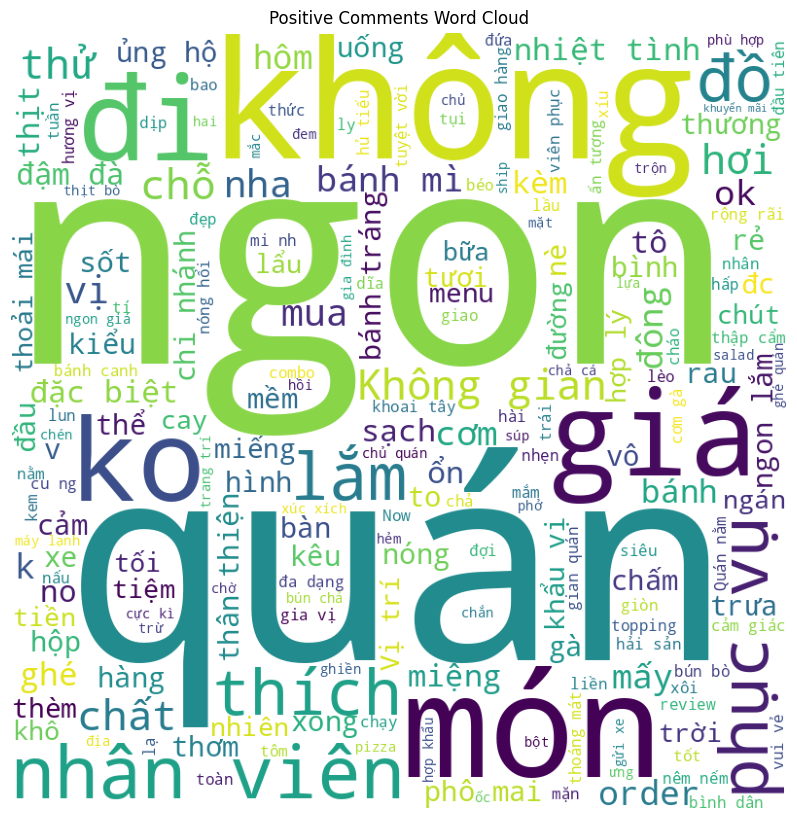

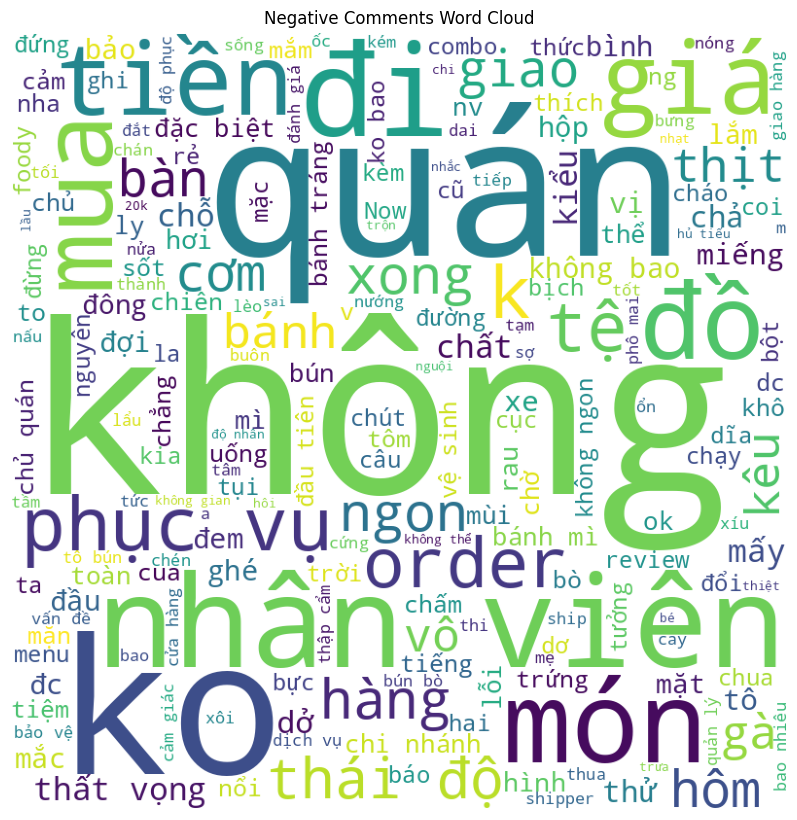

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

pRatingLevel = 6  # rating >= pRatingLevel
mRatingLevel = 4  # rating <= mRatingLevel

def classify_review(comment, rating):
    score = 0
    for word in comment.split():
        count_p, lst_p = find_words(word, positive_words)
        count_m, lst_m = find_words(word, negative_words)
        score += count_p - count_m

    if (score > 0) and (rating >= pRatingLevel):
        return 'Positive'
    elif (score < 0) and (rating <= mRatingLevel):
        return 'Negative'
    elif (score == 0) and (mRatingLevel < rating < pRatingLevel):
        return 'Neutral'
    else:
        return 'Spam'

# Separate comments based on sentiment
positive_comments = data_review_food[data_review_food['Rating'] >= pRatingLevel]['Comment']
negative_comments = data_review_food[data_review_food['Rating'] <= mRatingLevel]['Comment']

# Generate word clouds for positive and negative comments
def generate_word_cloud(comments, title):
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=stopwords_lst,
                          min_font_size=10).generate(' '.join(comments))
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.title(title)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

generate_word_cloud(positive_comments, "Positive Comments Word Cloud")
generate_word_cloud(negative_comments, "Negative Comments Word Cloud")


In [47]:
spamRating= 5 # np.nan
data_review_food[rateCol]= data_review_food.apply(lambda r: r[input2Col] if r[labelCol] in[chPositiveSymbol, chNegativeSymbol, chNeutralSymbol] else spamRating, axis=1)
data_review_food

,ID,User,Time,Rating,Comment,IDRestaurant,Comment_std,cmt_Label,cmt_Rate
0,1,PHAN LE,20/12/2023 21:13,5.2,"Gà chiên còn sống, rất tanh. Khủng khiép",1,Gà chiên sống,neutral,5.2
1,2,Thúy,25/9/2023 15:43,5.0,"Đã ăn qua rồi, ăn ok ạ",1,Đã ăn_ok,neutral,5.0
2,3,Quyên Quyên,24/6/2023 11:11,5.0,Đã thư rất ngon,1,Đã thư ngon,spam,5.0
3,4,Phương Thảo,22/12/2022 14:58,1.0,Tệ .. mua mang về cho 1 gói tương ớt. Và xin t...,1,Tệ mua gói không Khách Mua mua món Cho gói khô...,negative,1.0
4,5,Quỳnh Nguyễn,23/9/2022 22:40,4.2,"21h30...2 đứa nhỏ kêu đói, sau 1 hồi bình loạn...",1,h302 kêu đói hồi bình_loạn chốt Đang háo_hức k...,spam,5.0
...,...,...,...,...,...,...,...,...,...
29954,29955,Trannuhamy,26/10/2020 12:16,7.0,Đặt quán bún thái này trong chương trình của c...,1595,Đặt quán bún_thái chương_trình coca ổn Đi kèm ...,positive,7.0
29955,29956,Phương,1/6/2021 15:34,10.0,"Bánh ngon, nóng.\nGiao hàng nhanh.\nGiá phải c...",1609,nóng Giao hàng Giá,spam,5.0
29956,29957,Tú,31/1/2021 14:29,3.4,Phục vụ quá tệ\nPizza xúc xích double phô mai ...,1609,tệ Pizza_xúc xích double phô_mai không pizza x...,negative,3.4
29957,29958,Hoàng Hậu Mai,27/10/2020 18:06,7.6,Đang thèm gà rán thì lướt trúng ngay combo gà ...,1609,Đang thèm gà rán lướt trúng combo gà rán + kho...,positive,7.6


In [48]:
#View out the distribution of each class
data_review_food[labelCol].value_counts()/data_review_food[labelCol].value_counts().sum()*100

,count
cmt_Label,
positive,55.494359
spam,35.843514
negative,4.332732
neutral,4.329394


The distribution of the data is quite imbalance and merging spam and negative and neutral into a class would be better

In [49]:
#After mergeing
data_review_food[labelCol]= data_review_food[labelCol].apply(lambda s: s if s == chPositiveSymbol else chNegativeSymbol)
data_review_food[labelCol].value_counts()/data_review_food[labelCol].value_counts().sum()*100

,count
cmt_Label,
positive,55.494359
negative,44.505641


#APPLYING MODEL

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

X = data_review_food[input1Col]
y = data_review_food[labelCol]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_val_tfidf = tfidf_vectorizer.transform(X_val)


Reason we have validatyion test to provide better evaluation the performance of the model after training and preventing from overfitting.


In [51]:
#Naive Bayes mode is good for baseline model
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

nb_predictions = nb_classifier.predict(X_test_tfidf)

print("--------------------------------------------------")
print("Naive Bayes classification report for Test:")
print(classification_report(y_test, nb_predictions))

--------------------------------------------------
Naive Bayes classification report for Test:
              precision    recall  f1-score   support

    negative       0.93      0.36      0.52      2000
    positive       0.66      0.98      0.79      2494

    accuracy                           0.70      4494
   macro avg       0.79      0.67      0.65      4494
weighted avg       0.78      0.70      0.67      4494



In [52]:
#Apply more advanced model such as Random-Forrest on both test - val set
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Xây dựng mô hình Random Forest
rf_classifier = RandomForestClassifier()

# Huấn luyện mô hình
rf_classifier.fit(X_train_tfidf, y_train)

# Đánh giá mô hình trên tập kiểm tra
y_pred = rf_classifier.predict(X_val_tfidf)
print("Random Forest classification report for validation:")
print(classification_report(y_val, y_pred))

Random Forest classification report for validation:
              precision    recall  f1-score   support

    negative       0.91      0.70      0.79      2000
    positive       0.80      0.94      0.86      2494

    accuracy                           0.84      4494
   macro avg       0.85      0.82      0.83      4494
weighted avg       0.85      0.84      0.83      4494



In [53]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Xây dựng mô hình Random Forest
rf_classifier = RandomForestClassifier()

# Huấn luyện mô hình
rf_classifier.fit(X_train_tfidf, y_train)

# Đánh giá mô hình trên tập kiểm tra
y_pred = rf_classifier.predict(X_test_tfidf)
print("Random Forest classification report for test:")
print(classification_report(y_test, y_pred))

Random Forest classification report for test:
              precision    recall  f1-score   support

    negative       0.89      0.70      0.78      2000
    positive       0.79      0.93      0.86      2494

    accuracy                           0.83      4494
   macro avg       0.84      0.81      0.82      4494
weighted avg       0.84      0.83      0.82      4494



In [54]:
pip install lightgbm

In [55]:
#Using boosting technique LightGBM
from lightgbm import LGBMClassifier
lgbm_classifier = LGBMClassifier(n_estimators=100, random_state=42)

# Train the model
lgbm_classifier.fit(X_train_tfidf, y_train)

# Evaluate the model on the test set
y_pred = lgbm_classifier.predict(X_val_tfidf)
print("Random Forest classification report for validation:")
print(classification_report(y_val, y_pred))

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 11637, number of negative: 9333
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.330875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 103871
[LightGBM] [Info] Number of data points in the train set: 20970, number of used features: 2322
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554936 -> initscore=0.220633
[LightGBM] [Info] Start training from score 0.220633
Random Forest classification report for validation:
              precision    recall  f1-score   support

    negative       0.90      0.81      0.85      2000
    positive       0.86      0.93      0.89      2494

    accuracy                           0.88      4494
   macro avg       0.88      0.87      0.87      4494
weighted avg       0.88      0.88      0.87      4494



In [56]:
from lightgbm import LGBMClassifier
lgbm_classifier = LGBMClassifier(n_estimators=100, random_state=42)

# Train the model
lgbm_classifier.fit(X_train_tfidf, y_train)

# Evaluate the model on the test set
y_pred = lgbm_classifier.predict(X_test_tfidf)
print("Random Forest classification report for test:")
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 11637, number of negative: 9333
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.421639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 103871
[LightGBM] [Info] Number of data points in the train set: 20970, number of used features: 2322
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.554936 -> initscore=0.220633
[LightGBM] [Info] Start training from score 0.220633
Random Forest classification report for test:
              precision    recall  f1-score   support

    negative       0.91      0.80      0.85      2000
    positive       0.86      0.93      0.89      2494

    accuracy                           0.88      4494
   macro avg       0.88      0.87      0.87      4494
weighted avg       0.88      0.88      0.87      4494



In [59]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score


In [60]:
#Calculateing AUC score for val
roc_auc_score(y_val, lgbm_classifier.predict_proba(X_val_tfidf)[:, 1])


0.9397924017642342

In [61]:
#Calculateing AUC score for test

roc_auc_score(y_test, lgbm_classifier.predict_proba(X_test_tfidf)[:, 1])


0.9343205693664794

LightGBM has better performance than RandomForrest and Naive Bayes
- 88 % > 84% > 72 % for validation set
- 88 % > 82% > 70% for test set
- ROC - AUC score for both val and test set is 0.93 which mean the model performing very well in distinguishing between positive and negative labels

In [62]:
#Average Rating
average_ratings = data_review_food.groupby('IDRestaurant')[rateCol].mean().reset_index()
average_ratings

,IDRestaurant,cmt_Rate
0,1,5.946000
1,2,5.200000
2,3,5.922000
3,4,5.671429
4,5,6.920000
...,...,...
1169,1583,10.000000
1170,1589,9.810000
1171,1595,7.000000
1172,1609,5.333333


In [63]:
table = pd.crosstab(data_review_food['IDRestaurant'], data_review_food[labelCol])
print(table)

cmt_Label     negative  positive
IDRestaurant                    
1                   57        43
2                    1         0
3                   59        41
4                    7         7
5                    9        11
...                ...       ...
1583                 0         1
1589                 3        97
1595                 0         1
1609                 2         1
1612                 0         1

[1174 rows x 2 columns]


In [64]:
#merging the average rating with the table positive and negative review
table = pd.merge(table, average_ratings, left_on='IDRestaurant', right_on='IDRestaurant', how='left')
table = table.reset_index(drop=True)
table

,IDRestaurant,negative,positive,cmt_Rate
0,1,57,43,5.946000
1,2,1,0,5.200000
2,3,59,41,5.922000
3,4,7,7,5.671429
4,5,9,11,6.920000
...,...,...,...,...
1169,1583,0,1,10.000000
1170,1589,3,97,9.810000
1171,1595,0,1,7.000000
1172,1609,2,1,5.333333


In [65]:
#load in the dataset for backtesting
data_restaurant = pd.read_csv('/content/drive/MyDrive/Cung_cap_HV_ShopeeFood/1_Restaurants.csv')

data_restaurant

,ID,Restaurant,Address,Time,Price,District
0,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00 - 23:59,50.000 - 200.000,Quận 1
1,2,Cháo Trắng - Cháo Thịt Bằm BK House - Phạm Viế...,"112B Phạm Viết Chánh, P. Nguyễn Cư Trinh, Quận...",00:00 - 23:59,5.000 - 40.000,Quận 1
2,3,Texas Chicken - Nguyễn Thái Học,"115 Nguyễn Thái Học , Quận 1, TP. HCM",NaN,30.000 - 300.000,Quận 1
3,4,Bếp Chay 365,"Tầng 1, 35 Nguyễn Văn Tráng, P. Bến Thành, Quậ...",NaN,15.000 - 50.000,Quận 1
4,5,Bánh Canh Cua Linh,"80A Điện Biên Phủ, P. Đa Kao, Quận 1, TP. HCM",06:20 - 22:00,25.000 - 35.000,Quận 1
...,...,...,...,...,...,...
1617,1618,Món Ăn Miền Trung - Thắng Lợi,"180/1C Tô Ký - Khu Phố 2, P. Tân Chánh Hiệp, Q...",NaN,19.000 - 79.000,Quận 12
1618,1619,Bánh Mì Bò Nướng Cô Ba - Hiệp Thành 17,"284 Hiệp Thành 17, P. Hiệp Thành, Quận 12, TP....",05:30 - 21:00,0 - 0,Quận 12
1619,1620,Anh Anh Quán - Cơm Tấm Sườn Ốp La & Bún Thịt N...,"89 Trương Thị Hoa, P. Tân Thới Hiệp, Quận 12, ...",NaN,30.000 - 36.000,Quận 12
1620,1621,Phú Mập - Cháo Lòng - Lê Văn Khương,"756 Lê Văn Khương, P. Thới An, Quận 12, TP. HCM",NaN,0 - 0,Quận 12


In [66]:
#Merging all the previous table with each other
merged_data = pd.merge(data_restaurant, table, left_on='ID', right_on='IDRestaurant', how='left')
merged_data = merged_data.drop('IDRestaurant', axis=1)

merged_data

,ID,Restaurant,Address,Time,Price,District,negative,positive,cmt_Rate
0,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00 - 23:59,50.000 - 200.000,Quận 1,57.0,43.0,5.946000
1,2,Cháo Trắng - Cháo Thịt Bằm BK House - Phạm Viế...,"112B Phạm Viết Chánh, P. Nguyễn Cư Trinh, Quận...",00:00 - 23:59,5.000 - 40.000,Quận 1,1.0,0.0,5.200000
2,3,Texas Chicken - Nguyễn Thái Học,"115 Nguyễn Thái Học , Quận 1, TP. HCM",NaN,30.000 - 300.000,Quận 1,59.0,41.0,5.922000
3,4,Bếp Chay 365,"Tầng 1, 35 Nguyễn Văn Tráng, P. Bến Thành, Quậ...",NaN,15.000 - 50.000,Quận 1,7.0,7.0,5.671429
4,5,Bánh Canh Cua Linh,"80A Điện Biên Phủ, P. Đa Kao, Quận 1, TP. HCM",06:20 - 22:00,25.000 - 35.000,Quận 1,9.0,11.0,6.920000
...,...,...,...,...,...,...,...,...,...
1617,1618,Món Ăn Miền Trung - Thắng Lợi,"180/1C Tô Ký - Khu Phố 2, P. Tân Chánh Hiệp, Q...",NaN,19.000 - 79.000,Quận 12,NaN,NaN,NaN
1618,1619,Bánh Mì Bò Nướng Cô Ba - Hiệp Thành 17,"284 Hiệp Thành 17, P. Hiệp Thành, Quận 12, TP....",05:30 - 21:00,0 - 0,Quận 12,NaN,NaN,NaN
1619,1620,Anh Anh Quán - Cơm Tấm Sườn Ốp La & Bún Thịt N...,"89 Trương Thị Hoa, P. Tân Thới Hiệp, Quận 12, ...",NaN,30.000 - 36.000,Quận 12,NaN,NaN,NaN
1620,1621,Phú Mập - Cháo Lòng - Lê Văn Khương,"756 Lê Văn Khương, P. Thới An, Quận 12, TP. HCM",NaN,0 - 0,Quận 12,NaN,NaN,NaN


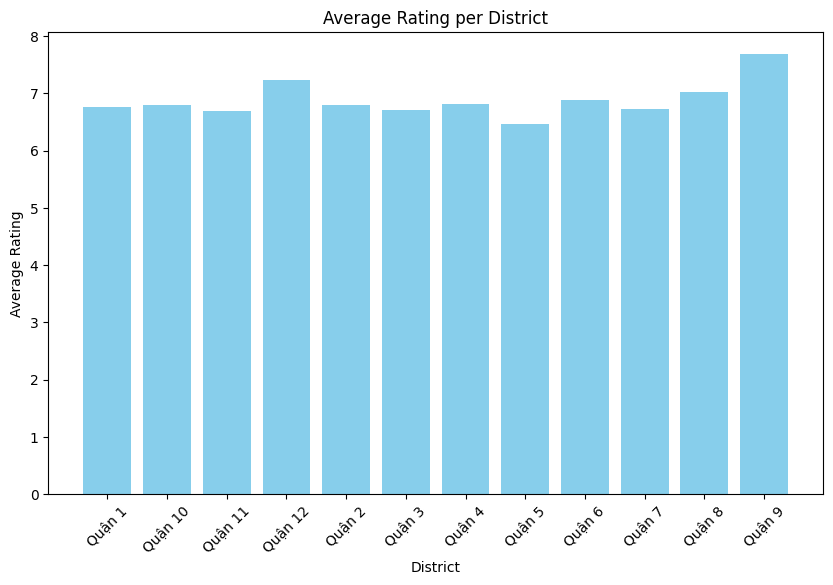

In [67]:
#plot out to see that which district has the highest rating
avg_rating_per_district = merged_data.groupby('District')[rateCol].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(avg_rating_per_district['District'], avg_rating_per_district[rateCol], color='skyblue')
plt.xlabel('District')
plt.ylabel('Average Rating')
plt.title('Average Rating per District')
plt.xticks(rotation=45)
plt.show()

As we see in the plot, district 9 has the highest rating review due to diverse amount and great quality of food

In [68]:
def DrawWordCloud(restaurantID, data_review_food, data_restaurant, labelText= ""):
    wc_stopword= stopwords_lst.copy()
    wc_stopword.extend(['quán', 'món'])

    draw_df= data_review_food[data_review_food['IDRestaurant'] == restaurantID]
    if labelText != "":
        draw_df= draw_df[draw_df[labelCol] == labelText]
    if len(draw_df) > 0:
        theLine= data_restaurant[data_restaurant['ID'] == restaurantID]
        print(theLine)
        # Generate a word cloud image
        wordcloud = WordCloud(width = 800, height = 800,
                        background_color ='white',
                        stopwords = wc_stopword,
                        max_words= 50,
                        min_font_size = 10).generate(' '.join(draw_df[input1Col]))

        # Plot the WordCloud image
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)

        plt.show()
    else:
        print('No record is valid.')

Back-testing random restaurant to see thier positive and negative review

   ID                                         Restaurant  \
6   7  Bún Riêu Cua Ốc Phang Rang Ninh Thuận - Nguyễn...   

                                             Address           Time  \
6  66 Nguyễn Thái Bình, P. Nguyễn Thái Bình, Quận...  06:30 - 21:30   

             Price District  
6  35.000 - 55.000   Quận 1  


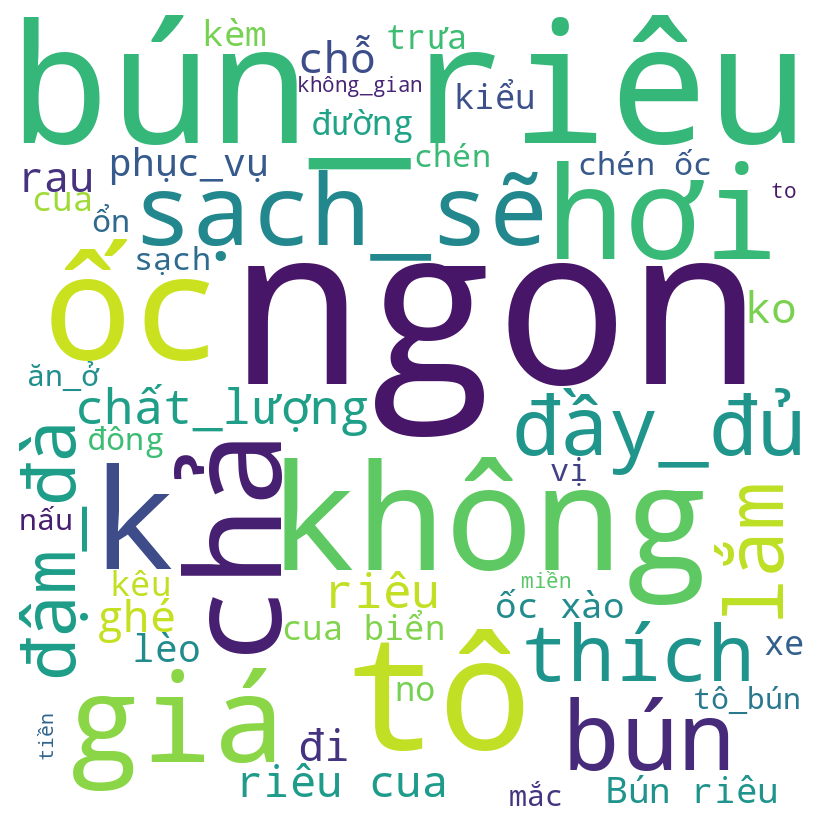

In [69]:
#Positive review about them
DrawWordCloud(restaurantID= 7, data_review_food= data_review_food, data_restaurant= data_restaurant, labelText= chPositiveSymbol)

   ID                                         Restaurant  \
6   7  Bún Riêu Cua Ốc Phang Rang Ninh Thuận - Nguyễn...   

                                             Address           Time  \
6  66 Nguyễn Thái Bình, P. Nguyễn Thái Bình, Quận...  06:30 - 21:30   

             Price District  
6  35.000 - 55.000   Quận 1  


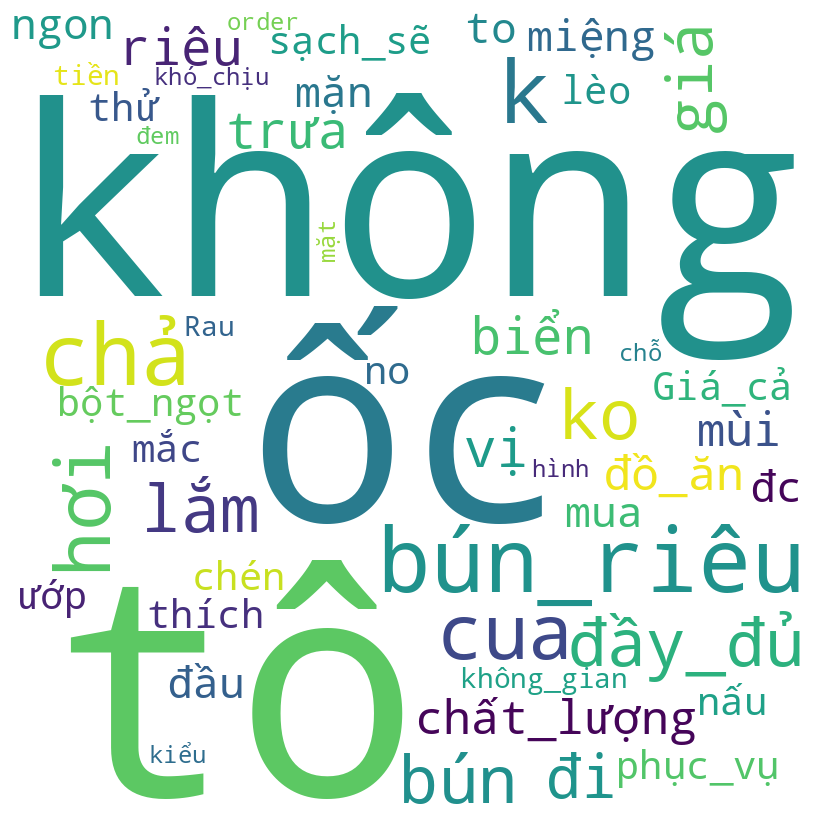

In [70]:
#Negative Review about them
DrawWordCloud(restaurantID= 7, data_review_food= data_review_food, data_restaurant= data_restaurant, labelText= chNegativeSymbol)